In [1]:
# Import all necessary libraries
library("readxl")
library("ggplot2")
library("tidyr")
library("dplyr")

# Set the working directory
setwd("C:/Users/myers/Documents/DSC640/Week1&2_Data")

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# Import the hotdog data
hotdog <- read_excel("hotdog-contest-winners.xlsm")
head(hotdog)

Year,Winner,Dogs eaten,Country,New record
1980,Paul Siederman & Joe Baldini,9.10,United States,0
1981,Thomas DeBerry,11.00,United States,0
1982,Steven Abrams,11.00,United States,0
1983,Luis Llamas,19.50,Mexico,0
1984,Birgit Felden,9.50,Germany,0
1985,Oscar Rodriguez,11.75,United States,0


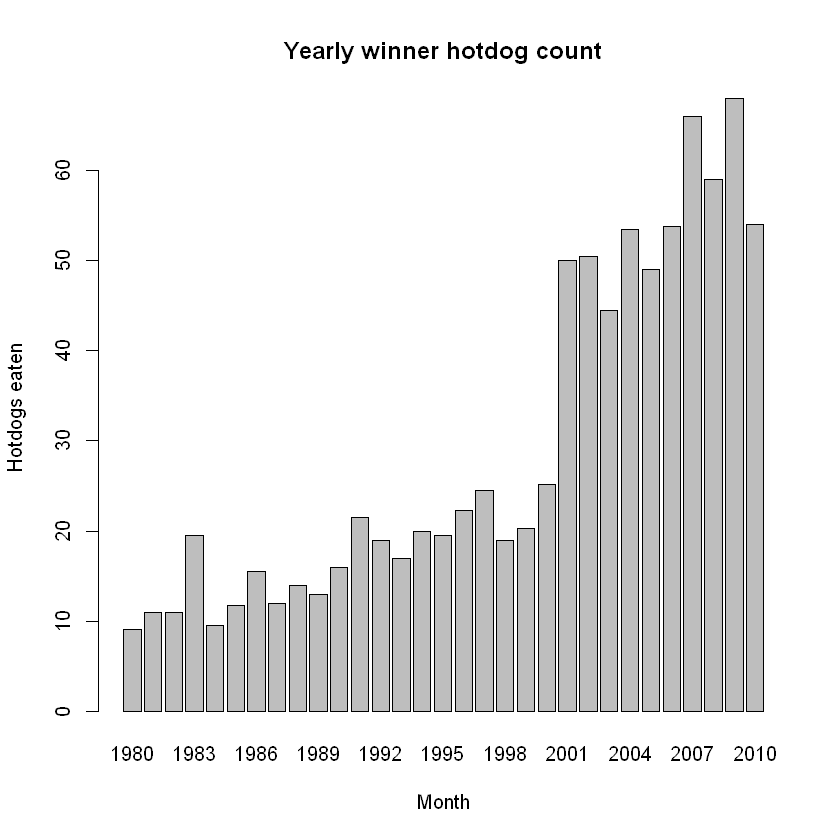

In [3]:
# Create the bar chart of number of hot dogs eaten by the winner each year
barplot(hotdog$`Dogs eaten`, 
        hotdog$Year, 
        names.arg = hotdog$Year,
        xlab = "Month",
        ylab = "Hotdogs eaten",
        main = "Yearly winner hotdog count")

In [4]:
# Import the Obama approval rating dataset
obama <- read_excel("obama-approval-ratings.xls")
head(obama)

Issue,Approve,Disapprove,None
Race Relations,52,38,10
Education,49,40,11
Terrorism,48,45,7
Energy Policy,47,42,11
Foreign Affairs,44,48,8
Environment,43,51,6


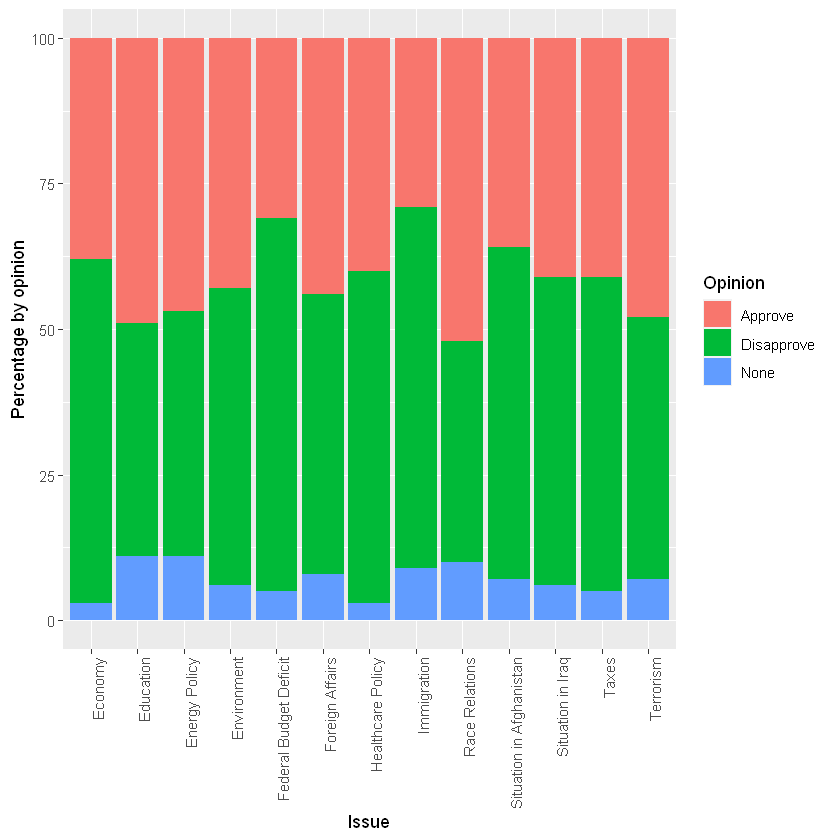

In [5]:
# https://cran.r-project.org/web/packages/magrittr/vignettes/magrittr.html


# Convert the obama rating table to a long version (documentation on the long table found at the above link)
obama_long_table <- obama %>% 

# Reformat the dataframe into a long table and define the new columns
    tidyr::gather('Opinion',
                  'Percentage by opinion', 
                  Approve, 
                  Disapprove, 
                  None)

# Define the data used in the plot
ggplot2::ggplot(data = obama_long_table, 
                ggplot2::aes(x = Issue, 
                             y = `Percentage by opinion`, 
                             fill = Opinion)) + 

# Choose the bar chart
ggplot2::geom_bar(stat='identity') + 

# Rotate the text elements 90 degrees for readability
ggplot2::theme(axis.text.x = element_text(angle = 90, hjust = 1))
    

In [6]:
# Define the hotdog_edit variable by piping the hotdog dataframe into the groupby function and then create
# a tally of how many times each country hosted the event
hotdog_edit <- hotdog %>% 
                    group_by(Country) %>% 
                        tally()
hotdog_edit

Country,n
Germany,1
Japan,9
Mexico,1
United States,20


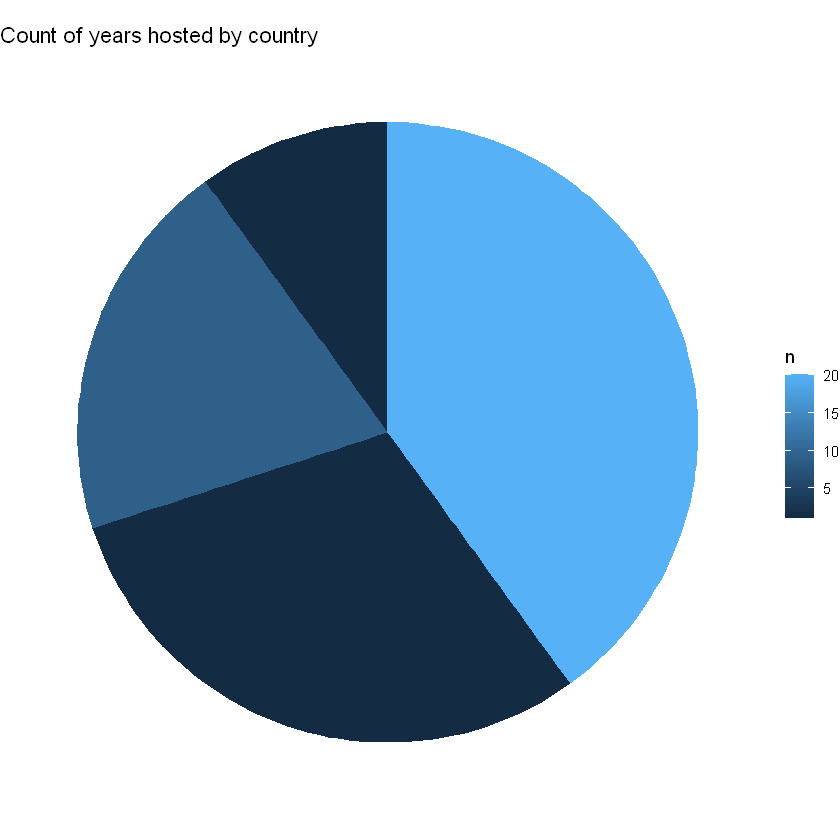

In [7]:
# Pipe the hotdog_edit dataframe into the plotting function
hotdog_edit %>%

# Define the data used in the plot
    ggplot2::ggplot(ggplot2::aes(x="",
                                 y=Country,
                                 fill = n)) +

# Create the bar chart of the above data
    ggplot2::geom_bar(stat='identity') + 

# Convert the bar chart to a pie chart by converting the values with polar coordinates
    ggplot2::coord_polar('y', start=0) +

# Define the aesthetics of the chart
    ggplot2::ggtitle("Count of years hosted by country") + 
    theme_void()

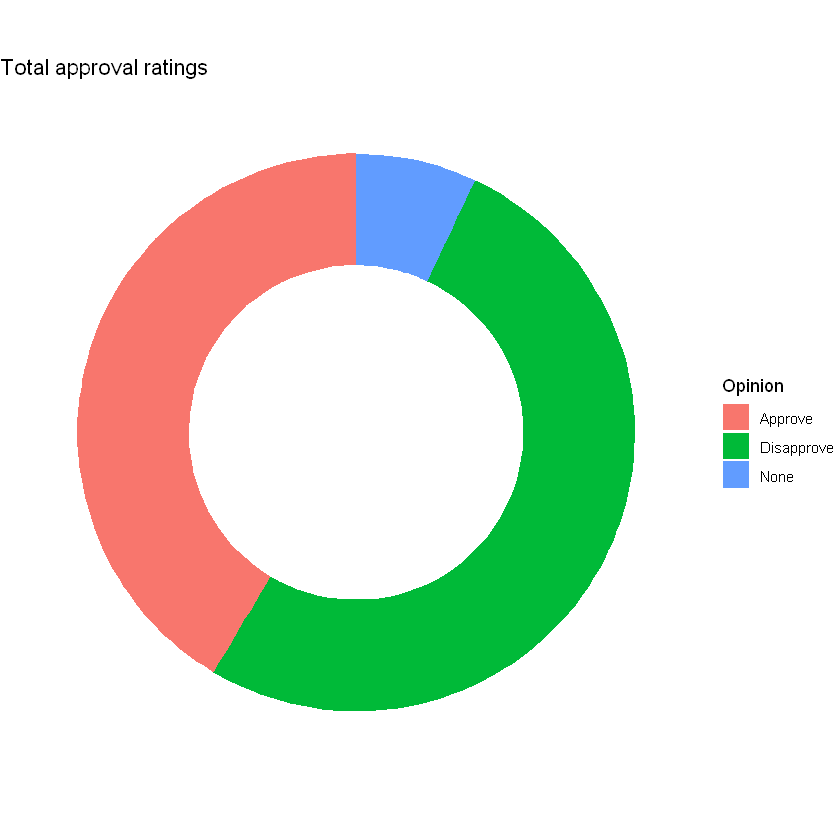

In [8]:
# Pipes the obama_long_table into the plotting function
obama_long_table %>%

# By defining the x value in this case we are defining the width of the inner circle
    ggplot2::ggplot(ggplot2::aes(x=2,
                                y = `Percentage by opinion`,
                                fill = Opinion)) +

# Create the bar chart of the data and then convert it using polar coordinates
    ggplot2::geom_bar(stat = 'identity') +
    ggplot2::coord_polar('y', start = 0) +

# Define the plots aesthetics
    ggplot2::ggtitle("Total approval ratings") +
    theme_void() + 

# Define the limits of the inner circle
    xlim(.2,2.5)